In [101]:
from qiskit import *
sim = Aer.get_backend('aer_simulator')

from random import randint, sample

In [102]:
def dj(sz, oracle):
    qbits = QuantumRegister(sz + 1)
    cbits = ClassicalRegister(sz)

    ckt = QuantumCircuit(qbits, cbits)
    ckt.x(qbits[sz]); ckt.barrier()
    for qbit in qbits:
        ckt.h(qbit)
    ckt.barrier()
    
    #ckt += oracle # += concatenates Quantum Circuits. += is deprecated, use compose()
    ckt = ckt.compose(oracle)
    ckt.barrier()
    
    for i in range(sz):
        ckt.h(qbits[i])

    # measurement and answer extraction
    
    for i in range(sz): 
        ckt.measure(i, i)
    
    vals = sim.run(assemble(ckt)).result().get_counts()
    print(vals)
    ans = "balanced"
    if "0"*sz in vals:
        ans = "constant"
    print(ans)
    return ckt

In [103]:
def make_constant_oracle(sz):
    # oracle: |x> tensor |y> -> |x> tensor |y xor f(x)=0/1> = |x> tensor |y> or |y^c>
    c = QuantumCircuit(sz + 1)
    if randint(0, 1): c.x(sz)
    return c

In [104]:
def make_balanced_oracle(sz):
    c = QuantumCircuit(sz + 1)
    selected = sample(list(range(sz)), randint(1, sz))
    for index in selected:
        c.cx(index, sz)
    return c

{'1101111': 1024}
balanced


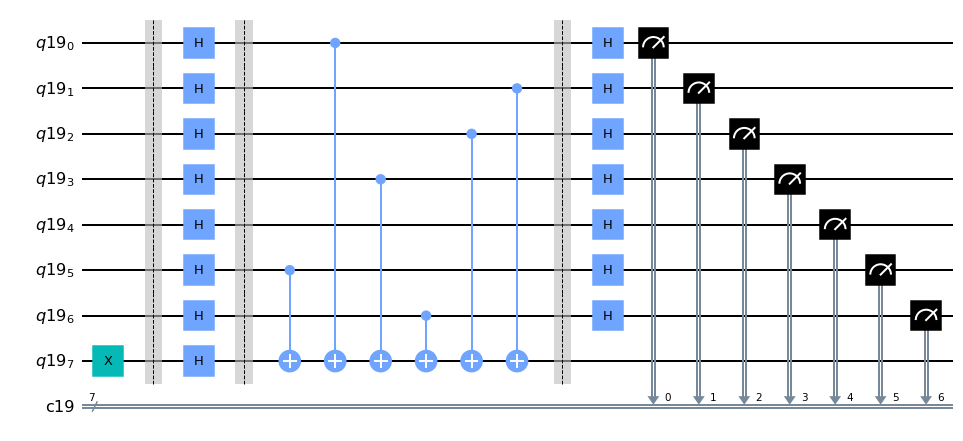

In [105]:
sz = randint(1, 20)
c = dj(sz, make_balanced_oracle(sz))
c.draw("mpl")